In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# f = lambda x, y: 4 * y**3 + x**2 - 3 * x * y - x + 9
# x0 = [-0.5, 1]
# e = 0.5
# beta = 0.5
# epsilon = 0.01
# n = 2

In [3]:
f = lambda x_1, x_2: 2.5 * (x_1 ** 2 - x_2) ** 2 + (1 - x_1) ** 2 
x0 = [-0.5, 1]
e = 0.5
beta = 0.5
epsilon = 0.01
n = 2

In [4]:
def hooke_jeeves(x0, n, e, beta, epsilon, max_iter=100):
    x_base = np.array(x0)
    x_new = x_base.copy()
    xi = np.eye(n)
    path = [x_base.copy()]

    for _ in range(max_iter):
        x_before = x_new.copy()
        improved = False
        
        # Exploratory move
        for j in range(n):
            for sign in [1, -1]:
                x_trial = x_new + sign * e * xi[j]
                if f(*x_trial) < f(*x_new):
                    x_new = x_trial
                    improved = True
                    break
            if improved:
                break
        
        if improved:
            # Pattern move
            x_step = 2 * x_new - x_base
            if f(*x_step) < f(*x_base):
                x_base = x_new
                x_new = x_step
            else:
                x_base = x_new
        else:
            e *= beta

        path.append(x_new.copy())
        
        if np.linalg.norm(x_before - x_new) < epsilon:
            break

    return x_new, path

Optymalny punkt: [1. 1.]
Wartość funkcji w punkcie optymalnym: 0.0


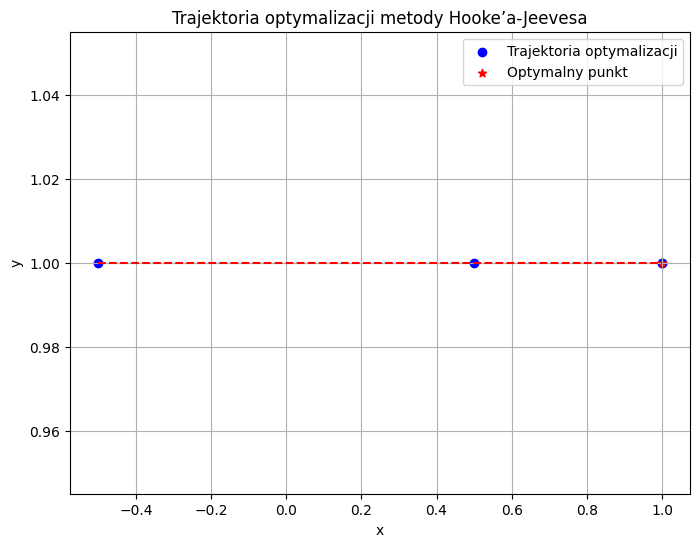

In [5]:
opt_point, path = hooke_jeeves(x0, n, e, beta, epsilon)
path = np.array(path)

print("Optymalny punkt:", opt_point)
print("Wartość funkcji w punkcie optymalnym:", f(*opt_point))

plt.figure(figsize=(8, 6))
plt.scatter(path[:, 0], path[:, 1], c='blue', label='Trajektoria optymalizacji')
plt.plot(path[:, 0], path[:, 1], 'r--')
plt.scatter([opt_point[0]], [opt_point[1]], c='red', marker='*', label='Optymalny punkt')
plt.title('Trajektoria optymalizacji metody Hooke’a-Jeevesa')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()